# CURA Presentation: Macroeconomic Signals as of 22 April 2025
## Professor Timothy H. Savage, Ph.D., Counselor of Real Estate
### NYU Schack Institute of Real Estate
### Faculty Director | CREFC Center for Real Estate Finance

In [1]:
%matplotlib inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

## The Current Macroeconomic Landspace

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01').dropna()
one_year = fred.get_series("DGS1", observation_start='1990-01-01').dropna()
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01').dropna()

Text(0, 0.5, '%')

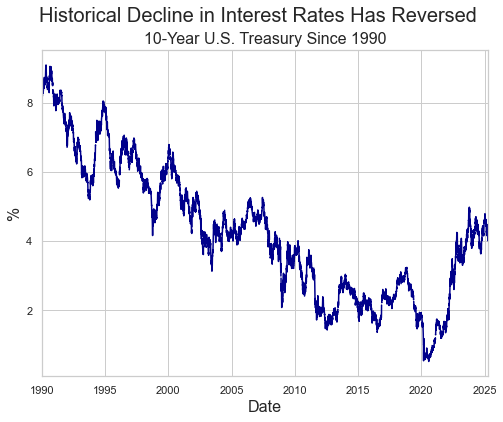

In [3]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Historical Decline in Interest Rates Has Reversed', fontsize=20)
plt.title('10-Year U.S. Treasury Since 1990', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

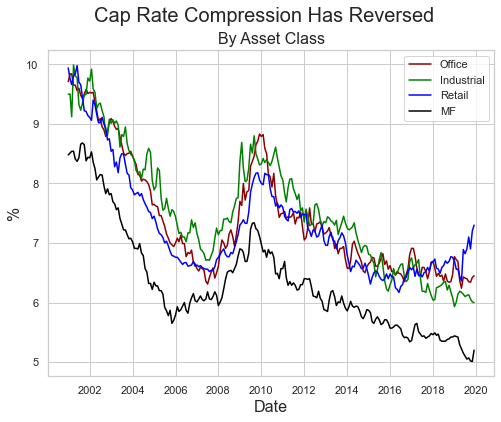

In [4]:
cap_rates = pd.read_excel("cap rates.xls", index_col='Date')
cap_rates = cap_rates.drop(['GT10'], axis=1)
cap_rates = cap_rates.rename(columns={"Retail":"R", "Multifam":"M", "Indust":"I", "Office":"O"})

plt.figure(figsize = (8, 6))
plt.suptitle("Cap Rate Compression Has Reversed", fontsize=20)
plt.title("By Asset Class", fontsize=16)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

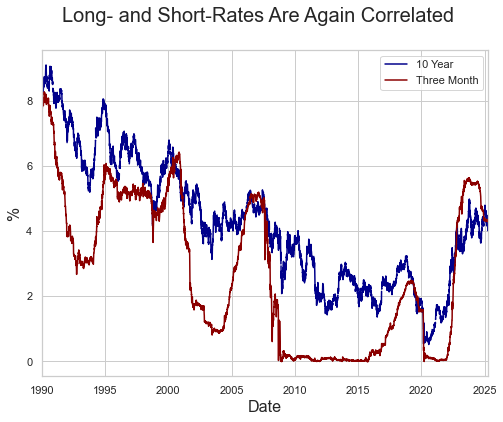

In [5]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Are Again Correlated', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0.5, 0, 'Date')

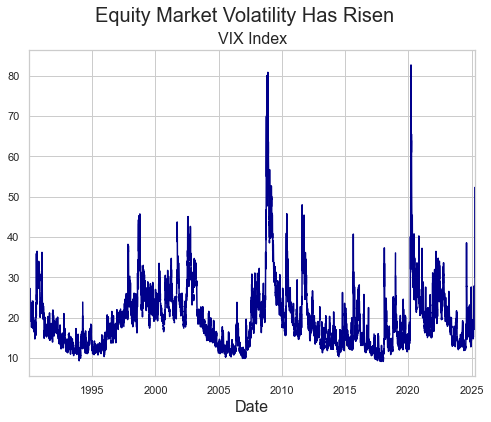

In [6]:
vix = fred.get_series("VIXCLS")
vix.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Equity Market Volatility Has Risen', fontsize=20)
plt.title('VIX Index', fontsize=16)
plt.xlabel('Date', fontsize=16)

Text(0.5, 0, 'Date')

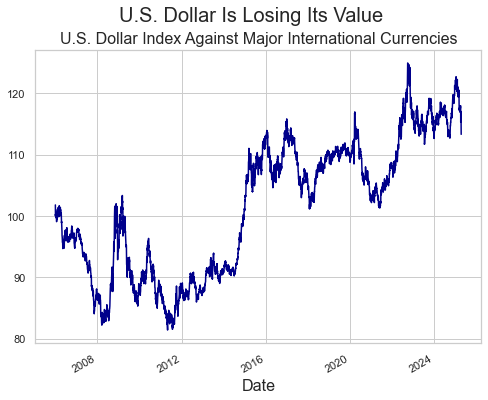

In [7]:
vix = fred.get_series("DTWEXAFEGS").dropna()
vix.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('U.S. Dollar Is Losing Its Value', fontsize=20)
plt.title('U.S. Dollar Index Against Major International Currencies', fontsize=16)
plt.xlabel('Date', fontsize=16)

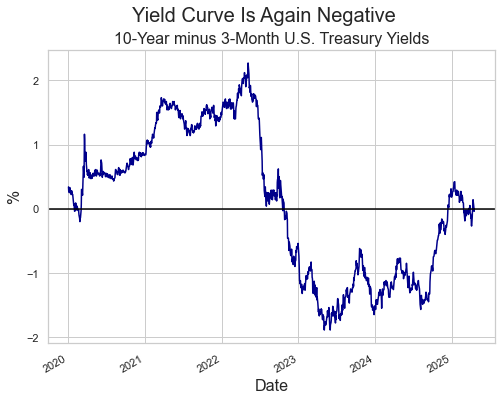

In [8]:
yield_curve = fred.get_series("T10Y3M", observation_start='2020-01-01').dropna()
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Yield Curve Is Again Negative', fontsize=20)
plt.title('10-Year minus 3-Month U.S. Treasury Yields', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")

Text(0, 0.5, '')

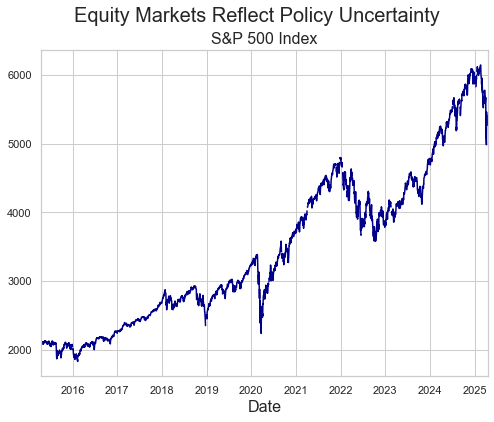

In [9]:
sp500 = fred.get_series("SP500", observation_start='2000-01-01')
sp500.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Equity Markets Reflect Policy Uncertainty', fontsize=20)
plt.title('S&P 500 Index', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)

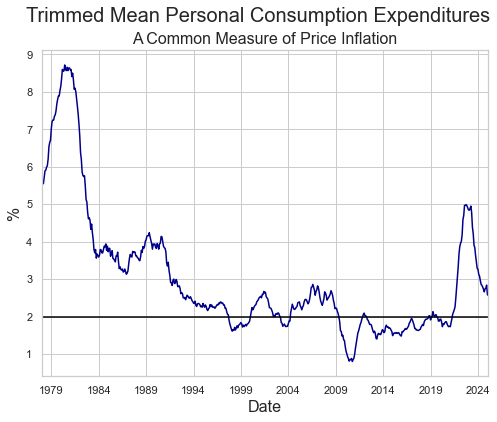

In [10]:
inflation = fred.get_series("PCETRIM12M159SFRBDAL").dropna()
inflation.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Trimmed Mean Personal Consumption Expenditures', fontsize=20)
plt.title('A Common Measure of Price Inflation', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="black")

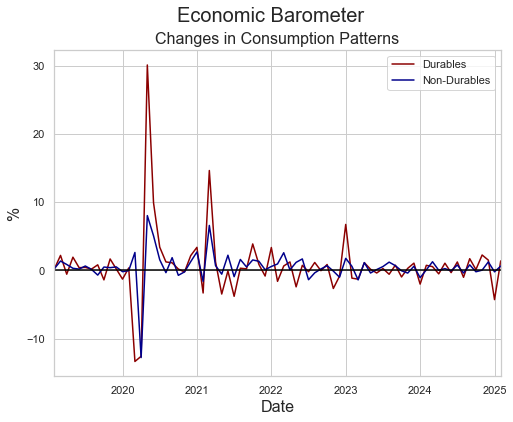

In [11]:
df = {}
df['Durables'] = fred.get_series("PCEDG", observation_start='2019-01-01').dropna()
df['Non-Durables'] = fred.get_series("PCEND", observation_start='2019-01-01').dropna()
df = pd.DataFrame(df)
df = df.pct_change(periods=1).dropna() * 100

colors = (["darkred", "darkblue"])
df.plot(figsize=(8, 6), color = colors)
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Changes in Consumption Patterns', fontsize=16)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')

Text(0, 0.5, 'Trillions $')

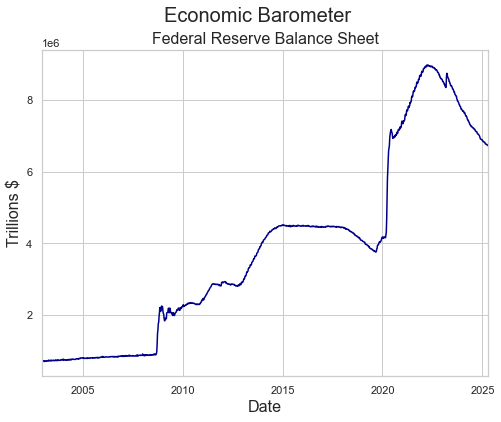

In [12]:
balance_sheet = fred.get_series("WALCL", observation_start='1990-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Federal Reserve Balance Sheet', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Trillions $', fontsize=16)

## U.S. Cap Rates

* A measure of yield.
* During the early days of the pandemic, when deals were scarce, cap rates compressed.
* Many of the factors that drive cap rates, such as monetary policy, have reversed.  
* **There is now upward pressure on cap rates**.
* Effective occupancy rates in U.S. office properties remains well below pre-pandemic levels.

# A Comment on Current U.S. Tariff Policy

* Tariffs are taxes on Americans, and polling indicates they understand it.  
* The recent tariffs comprise one of the largest tax increases in over 30 years.
* The tax incidence is well understood in economics and finance: low-income domestic consumers.  
* The share of U.S. trade to overall economic activity has been flat for nearly 30 years.
* The U.S. exports services, while it imports physical goods.  
* The U.S. population has a low savings rate, while Asian countries have high savings rates.  
    * **This is the source of the U.S. trade deficit**.
* Historically, trade wars have adversely impacted aggregate wealth and investment.
* In finance, we distinguish **risk** and **uncertainty**.